In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import geopandas as gpd
import altair as alt

In [ ]:
pd.DataFrame({'F':F[:,30],'Y':Y[:,30]})

In [ ]:
X[:,30]

In [4]:
np.linspace(3,5, 3)

array([3., 4., 5.])

In [102]:
radius_meters = []
radius_meters += list(range(100,1000,100))
radius_meters += list(range(1000,10000,1000))
radius_meters += list(range(10000,100000,10000))
radius_meters += list(range(100000,500000,50000))

In [165]:
latency = 1e-2
bd = 1e-13
tree = 2
f = lambda x,y: latency*np.ceil(1.0* y / x)**2 + bd * np.maximum(x**2,y**2) #+ 1 / x
# def func(X,Y):
    
#     for x, y in zip(X,Y):
#         latency * y / x + bd * max(x,y)
x = [3700,20000,120000]
y = radius_meters#np.logspace(1, 400000, 10)
X,Y = np.meshgrid(x,y)
F = f(X,Y)

density = 0.1
f2 = lambda x,y: latency*np.ceil(y / x)**2 + bd *density* np.maximum(x**2,y**2) #+ 1 / x

F2 = f2(X,Y)

In [123]:
# f1 = lambda r,d: latency*np.ceil(r)**2 + bd *d*np.maximum(1,r**2)

# r = np.linspace(0, 4, 100)
# d = np.linspace(1, 500, 100)
# R,D = np.meshgrid(r,d)
# F1 = f1(R,D)

In [166]:
src = pd.concat([pd.DataFrame({'query_time':F[:,sel],'r':Y[:,sel],'grid_size':X[0,sel],'density':1,'group':'fast_decoding'}) for sel in [0,1,2]])

alt.data_transformers.disable_max_rows()
alt.Chart(src).mark_line().encode(
    x=alt.X('r', scale=alt.Scale(type='log')),
    y=alt.Y('query_time',scale=alt.Scale(type='log')),
    color='grid_size:N'
).interactive()

alt.Chart(...)

In [113]:
src2 = pd.concat([pd.DataFrame({'F(y)':F2[:,sel],'y':Y[:,sel],'grid':X[0,sel],'density':1,'group':'slow_decoding'}) for sel in [0,1,2]])

In [54]:
sel = 84
src = pd.concat([pd.DataFrame({'F(y)':F[:,sel],'y':Y[:,sel],'grid':X[0,sel],'density':1,'group':'dense_large_grid'}),
pd.DataFrame({'F(y)':F2[:,sel],'y':Y[:,sel],'grid':X[0,sel],'density':density,'group':'sparse_large_grid'})])


In [55]:
sel = 1
src2 = pd.concat([pd.DataFrame({'F(y)':F[:,sel],'y':Y[:,sel],'grid':X[0,sel],'density':1,'group':'dense_small_grid'}),
pd.DataFrame({'F(y)':F2[:,sel],'y':Y[:,sel],'grid':X[0,sel],'density':density,'group':'sparse_small_grid'})])


In [108]:
src

,F(y),y,grid,density,group
0,1.000010e+01,100,10.000000,1,fast_decoding
1,4.000040e+01,200,10.000000,1,fast_decoding
2,9.000090e+01,300,10.000000,1,fast_decoding
3,1.600016e+02,400,10.000000,1,fast_decoding
4,2.500025e+02,500,10.000000,1,fast_decoding
...,...,...,...,...,...
30,6.250000e+07,250000,306.969697,1,fast_decoding
31,9.000000e+07,300000,306.969697,1,fast_decoding
32,1.225000e+08,350000,306.969697,1,fast_decoding
33,1.600000e+08,400000,306.969697,1,fast_decoding


In [62]:
alt.Chart(pd.concat([src,src2])).mark_line().encode(
    x=alt.X('y', scale=alt.Scale(type='log')),
    y=alt.Y('F(y)',scale=alt.Scale(type='log')),
    color='group:N'
).interactive()

alt.Chart(...)

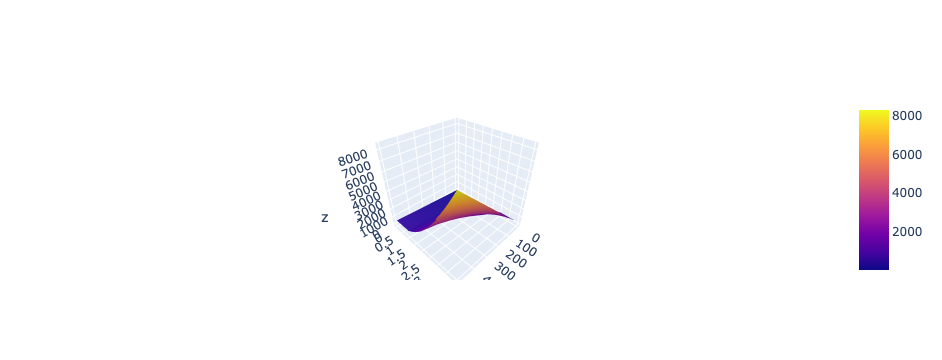

In [60]:
fig = go.Figure(data=[go.Surface(x=D, y=R, z=F1)])
fig.show()

In [ ]:
cont_us_counties_ovm = gpd.read_file("../data/overture/cont_us_counties_ovm.geojson")

In [ ]:
alt_data  = alt.InlineData(values = cont_us_counties_ovm.to_json(), #geopandas to geojson
                       # root object type is "FeatureCollection" but we need its features
                       format = alt.DataFormat(property='features',type='json'))

In [ ]:
source = cont_us_counties_ovm[['GEOID','cnt']].rename(columns={'GEOID':'id'})

In [ ]:
alt.Chart(alt_data).mark_geoshape(
).encode( 
    color=alt.Color('properties.cnt:Q',
                    scale=alt.Scale(type='bin-ordinal',bins=[0, 500, 1000, 1500, 2000],
                                    scheme=alt.SchemeParams(name='greenblue'))
                   )
).project(
    type='albersUsa'
).properties( 

    width=500,
    height=300
)

In [ ]:
url = "https://cdn.jsdelivr.net/npm/us-atlas@3/counties-10m.json"

In [161]:
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

In [ ]:
cont_us_counties_ovm[['GEOID','geometry','cnt']].rename(columns={'GEOID':'id'})

In [ ]:
source.dtypes

In [ ]:
import topojson as tp

In [ ]:
data = tp.utils.example_data_africa() 

In [ ]:
import requests

In [ ]:
#source['id'] = pd.to_numeric(source['id'], errors='coerce')

In [162]:
counties = alt.topo_feature("https://cdn.jsdelivr.net/npm/us-atlas@3/counties-10m.json",feature="counties")

choropleth_chart = alt.Chart(counties).mark_geoshape().encode(
    color=alt.Color('cnt:Q',
                    scale=alt.Scale(type='log',#bins=[0, 500, 1000, 1500, 2000000],
                                    scheme=alt.SchemeParams(name='greenblue')))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['cnt'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

chart

NameError: name 'chart' is not defined